<a href="https://colab.research.google.com/github/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/blob/main/DC_Traffic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from statsmodels.graphics.regressionplots import plot_partregress_grid

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import Datasets

In [2]:
# import crash datasets
# NOTE: the original Crash Data data file is too big to load into Github, therefore we had to break it down into multiple files. 
rawCrash1 = pd.read_csv('https://raw.githubusercontent.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/main/CrashData/Crashes_in_DC_0.csv', low_memory=False)
rawCrash2 = pd.read_csv('https://raw.githubusercontent.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/main/CrashData/Crashes_in_DC_1.csv', low_memory=False)
rawCrash3 = pd.read_csv('https://raw.githubusercontent.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/main/CrashData/Crashes_in_DC_2.csv', low_memory=False)
rawCrash4 = pd.read_csv('https://raw.githubusercontent.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/main/CrashData/Crashes_in_DC_3.csv', low_memory=False)
rawCrash5 = pd.read_csv('https://raw.githubusercontent.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/main/CrashData/Crashes_in_DC_4.csv', low_memory=False)
rawCrash6 = pd.read_csv('https://raw.githubusercontent.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/main/CrashData/Crashes_in_DC_5.csv', low_memory=False)

rawCrash = pd.concat([rawCrash1, rawCrash2, rawCrash3, rawCrash4, rawCrash5, rawCrash6])

In [63]:
# import weather dataset
rawWeather = pd.read_csv('https://raw.githubusercontent.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/main/WeatherData15-19.csv')

### Cleaning and Exploratory Data Analysis of Crash Data

In [4]:
# preview crash data
pd.set_option('display.max_columns', None)
rawCrash.head(3)

,X,Y,OBJECTID,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,ROADWAYSEGID,FROMDATE,TODATE,MARID,ADDRESS,LATITUDE,LONGITUDE,XCOORD,YCOORD,WARD,EVENTID,MAR_ADDRESS,MAR_SCORE,MAJORINJURIES_BICYCLIST,MINORINJURIES_BICYCLIST,UNKNOWNINJURIES_BICYCLIST,FATAL_BICYCLIST,MAJORINJURIES_DRIVER,MINORINJURIES_DRIVER,UNKNOWNINJURIES_DRIVER,FATAL_DRIVER,MAJORINJURIES_PEDESTRIAN,MINORINJURIES_PEDESTRIAN,UNKNOWNINJURIES_PEDESTRIAN,FATAL_PEDESTRIAN,TOTAL_VEHICLES,TOTAL_BICYCLES,TOTAL_PEDESTRIANS,PEDESTRIANSIMPAIRED,BICYCLISTSIMPAIRED,DRIVERSIMPAIRED,TOTAL_TAXIS,TOTAL_GOVERNMENT,SPEEDING_INVOLVED,NEARESTINTROUTEID,NEARESTINTSTREETNAME,OFFINTERSECTION,INTAPPROACHDIRECTION,LOCATIONERROR,LASTUPDATEDATE,MPDLATITUDE,MPDLONGITUDE,MPDGEOX,MPDGEOY,BLOCKKEY,SUBBLOCKKEY,FATALPASSENGER,MAJORINJURIESPASSENGER,MINORINJURIESPASSENGER,UNKNOWNINJURIESPASSENGER
0,-76.927085,38.894377,192957077,27991659,19050656,2019/03/26 13:33:18+00,12029642,534.43,18.93,615.0,14930.0,2019/03/26 04:00:00+00,1970/01/01 00:00:00+00,44982,274 DIVISION AVENUE NE,38.894518,-76.927255,406310.624,136299.237,Ward 7,{354DD7E1-A9A2-4240-9185-A3F4906C2228},274 DIVISION AVENUE NE,200.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,12024242,CLOUD PL NE,13.10,South,NaN,1970/01/01 00:00:00+00,38.894415,-76.927293,406307.42,136287.79,6fd11860be76867493da2ec98468c769,6fd11860be76867493da2ec98468c769,0,0,0,0
1,-77.036396,38.960467,192957078,27715972,18102625,2018/06/24 03:49:07+00,11001602,6713.71,3.26,8029.0,8915.0,2018/06/23 04:00:00+00,1970/01/01 00:00:00+00,256118,5800 16TH STREET NW,38.960164,-77.036781,396812.190,143584.581,Ward 4,{17DE2546-EE88-4444-AFF1-950425DC1621},5800 16TH STREET NW,200.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,11064872,NICHOLSON ST NW,32.57,North,NaN,1970/01/01 00:00:00+00,38.960459,-77.036431,396812.23,143604.39,3daa93cf853638a89321f921106cf299,3daa93cf853638a89321f921106cf299,0,0,0,0
2,-76.958738,38.896709,192957079,27715973,18102602,2018/06/24 04:05:53+00,12015342,2289.58,5.17,1272.0,12308.0,2018/06/23 04:00:00+00,1970/01/01 00:00:00+00,301049,3400 BENNING ROAD NE,38.896477,-76.951464,404210.372,136515.268,Ward 7,{1F2C12F2-A876-4219-B39E-2C8A3FAB41D7},3400 BENNING ROAD NE,200.0,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,1,0,0,1,12003402,34TH ST NE,109.14,West,NaN,1970/01/01 00:00:00+00,38.896747,-76.958724,404151.99,136570.94,51e1a4cc02033e1dd539bd6fdc0aaa57,bb461ebff117b1dad0d1e7163a274fdb,0,0,1,0


In [5]:
# number of rows and columns
rows = len(rawCrash.axes[0])
cols = len(rawCrash.axes[1])
print("Number of rows: ", rows)
print("Number of columns: ", cols)

# check for duplicates in rawCrash
rduplicate = rawCrash.duplicated()
print("number of duplicates in data:",rduplicate.sum())

Number of rows:  245136
Number of columns:  60
number of duplicates in data: 0


In [6]:
# display column names
print("there are",len(rawCrash.columns), "columns in the data")
print(rawCrash.columns)

there are 60 columns in the data
Index(['X', 'Y', 'OBJECTID', 'CRIMEID', 'CCN', 'REPORTDATE', 'ROUTEID',
       'MEASURE', 'OFFSET', 'STREETSEGID', 'ROADWAYSEGID', 'FROMDATE',
       'TODATE', 'MARID', 'ADDRESS', 'LATITUDE', 'LONGITUDE', 'XCOORD',
       'YCOORD', 'WARD', 'EVENTID', 'MAR_ADDRESS', 'MAR_SCORE',
       'MAJORINJURIES_BICYCLIST', 'MINORINJURIES_BICYCLIST',
       'UNKNOWNINJURIES_BICYCLIST', 'FATAL_BICYCLIST', 'MAJORINJURIES_DRIVER',
       'MINORINJURIES_DRIVER', 'UNKNOWNINJURIES_DRIVER', 'FATAL_DRIVER',
       'MAJORINJURIES_PEDESTRIAN', 'MINORINJURIES_PEDESTRIAN',
       'UNKNOWNINJURIES_PEDESTRIAN', 'FATAL_PEDESTRIAN', 'TOTAL_VEHICLES',
       'TOTAL_BICYCLES', 'TOTAL_PEDESTRIANS', 'PEDESTRIANSIMPAIRED',
       'BICYCLISTSIMPAIRED', 'DRIVERSIMPAIRED', 'TOTAL_TAXIS',
       'TOTAL_GOVERNMENT', 'SPEEDING_INVOLVED', 'NEARESTINTROUTEID',
       'NEARESTINTSTREETNAME', 'OFFINTERSECTION', 'INTAPPROACHDIRECTION',
       'LOCATIONERROR', 'LASTUPDATEDATE', 'MPDLATITUDE', 'MPDL

In [7]:
#droping the columns we won't likely use. Mosty location data. 
variables = ['REPORTDATE']
cleanCrash = rawCrash.loc[:,variables]

#converting date variables to datetime data types. Making new variables for day, month, hour, year
cleanCrash['REPORTDATE'] = pd.to_datetime(cleanCrash['REPORTDATE'])
cleanCrash['CrashCount'] = 1
cleanCrash['Hour'] = cleanCrash['REPORTDATE'].dt.hour
cleanCrash['Day'] = cleanCrash['REPORTDATE'].dt.day
cleanCrash['Month'] = cleanCrash['REPORTDATE'].dt.month
cleanCrash['Year'] = cleanCrash['REPORTDATE'].dt.year

In [8]:
# display crash information
cleanCrash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245136 entries, 0 to 4399
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   REPORTDATE  245136 non-null  datetime64[ns, UTC]
 1   CrashCount  245136 non-null  int64              
 2   Hour        245136 non-null  int64              
 3   Day         245136 non-null  int64              
 4   Month       245136 non-null  int64              
 5   Year        245136 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(5)
memory usage: 13.1 MB


In [9]:
# checking for null values. Very little and mostly in address and ward which is not too concerning, 
# dropped address from and to date
null = cleanCrash.isnull().sum()
print(null)

REPORTDATE    0
CrashCount    0
Hour          0
Day           0
Month         0
Year          0
dtype: int64


In [94]:
#Limit crash data to 2015-2019 to match the weather data range
crash = cleanCrash.loc[(cleanCrash['REPORTDATE'].dt.year >2015) & (cleanCrash['REPORTDATE'].dt.year < 2020)]

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

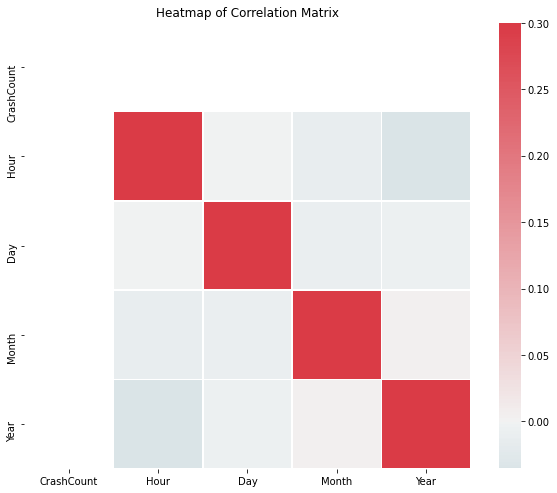

In [11]:
# Heatmap of features
corr = crash.corr()
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

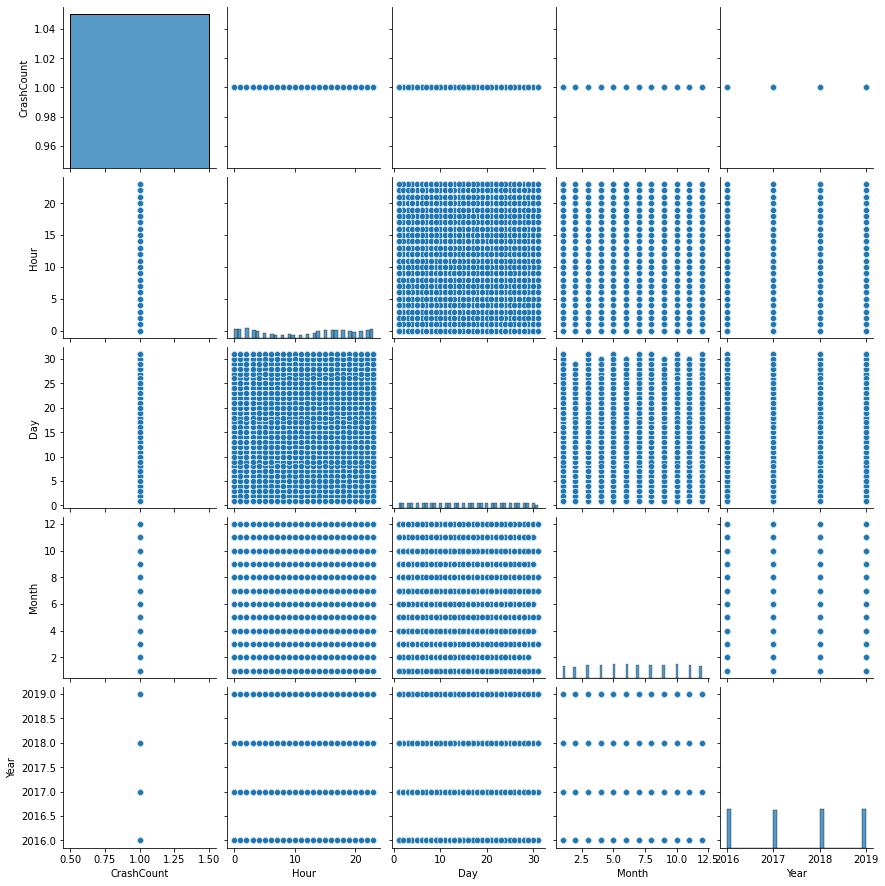

In [12]:
sns.pairplot(crash)

In [13]:
#checking shape to make sure correct number of columns were dropped
crash.shape
crash.max()

REPORTDATE    2019-12-31 23:59:56+00:00
CrashCount                            1
Hour                                 23
Day                                  31
Month                                12
Year                               2019
dtype: object

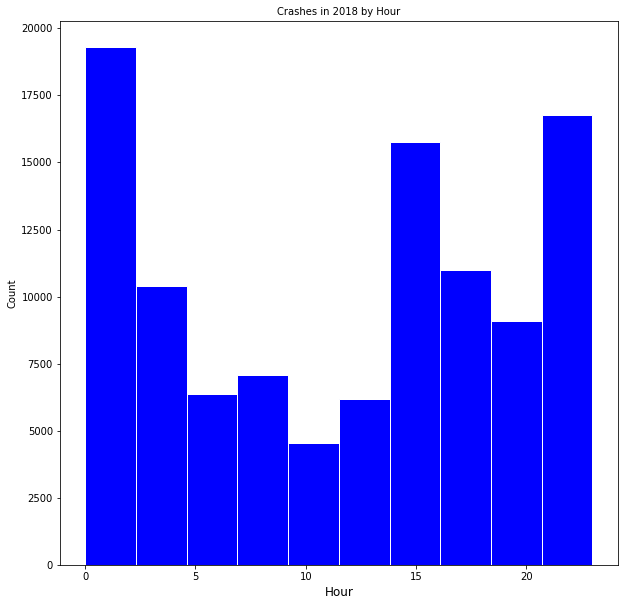

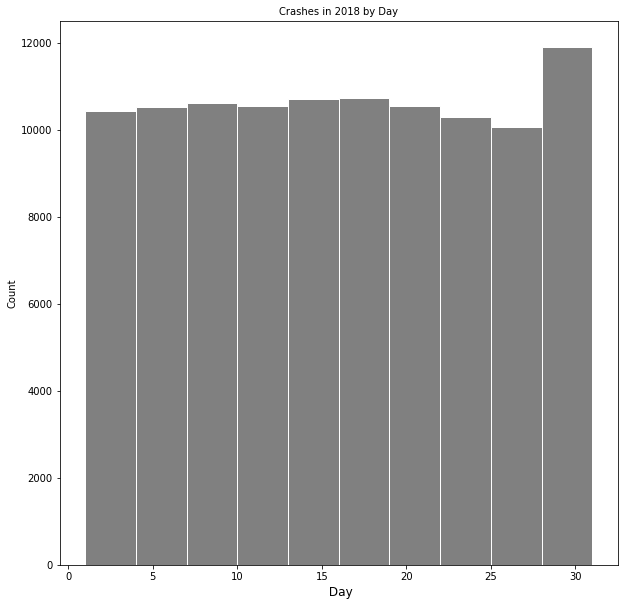

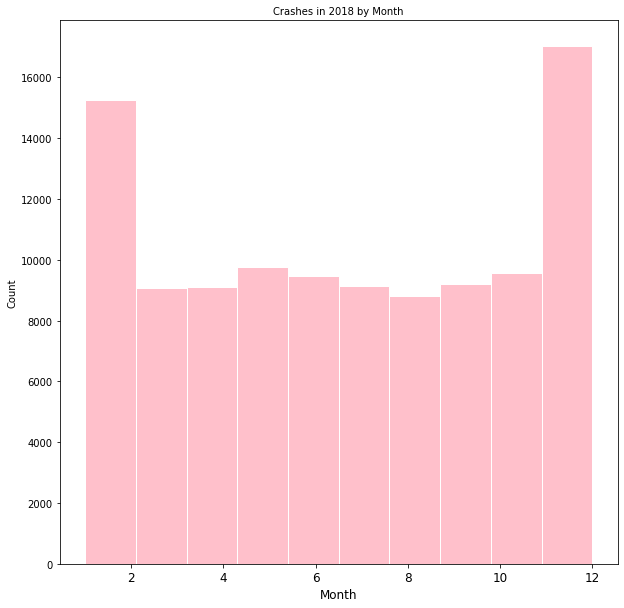

In [14]:
#Histogram of hours
fig = plt.figure(figsize=(10,10))
plt.hist(crash['Hour'], color = 'Blue',edgecolor = 'white')
plt.title('Crashes in 2018 by Hour', color = 'Black', size = 10)
plt.xlabel('Hour', size= 12)
plt.tick_params(axis='x', labelsize=10)
plt.ylabel('Count')
plt.show()

#Histogram of Days
fig = plt.figure(figsize=(10,10))
plt.hist(crash['Day'], color = 'Grey',edgecolor = 'white')
plt.title('Crashes in 2018 by Day', color = 'Black', size = 10)
plt.xlabel(' Day', size= 12)
plt.tick_params(axis='x', labelsize=10)
plt.ylabel('Count')
plt.show()

#Histogram of Months
fig = plt.figure(figsize=(10,10))
plt.hist(crash['Month'], color = 'Pink',edgecolor = 'white')
plt.title('Crashes in 2018 by Month', color = 'Black', size = 10)
plt.xlabel('Month', size= 12)
plt.tick_params(axis='x', labelsize=12)
plt.ylabel('Count')
plt.show()

### Cleaning and Exploratory Data Analysis of Weather Data

In [15]:
# set Date Time column as datetime data
rawWeather['Date time'] = pd.to_datetime(rawWeather['Date time'])

In [16]:
# view shape of weather data
rawWeather.shape

(1831, 17)

In [17]:
# filter weather date to 2016 and 
rawWeather = rawWeather.loc[(rawWeather['Date time'] > '2015-12-31')]
rawWeather.shape

(1465, 17)

In [18]:
#check duplicate 
duplicateRowsDF = rawWeather[rawWeather.duplicated(['Date time'])]
duplicateRowsDF.shape

(4, 17)

In [36]:
#filter duplicate records 
weather = rawWeather.drop_duplicates(subset ="Date time", keep = 'first', ignore_index = True)
weather.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,"Washington, DC, United States",2016-01-01,46.0,37.8,42.1,31.3,NaN,0.0,0.0,0.0,12.4,314.29,NaN,9.9,73.4,57.83,Partially cloudy
1,"Washington, DC, United States",2016-01-02,47.9,32.6,39.8,27.5,NaN,0.0,0.0,0.0,10.1,235.08,18.3,9.9,7.1,54.59,Clear
2,"Washington, DC, United States",2016-01-03,53.0,31.3,39.9,24.5,NaN,0.0,0.0,0.0,19.2,219.29,28.9,9.9,24.5,63.01,Clear
3,"Washington, DC, United States",2016-01-04,37.9,24.0,33.0,10.2,NaN,0.0,0.0,0.0,23.3,322.79,33.6,9.9,45.4,46.61,Partially cloudy
4,"Washington, DC, United States",2016-01-05,33.0,15.9,24.2,-0.2,NaN,0.0,0.0,0.0,23.4,321.42,32.2,9.9,0.0,41.26,Clear


In [20]:
# view weather dataframe information
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Name                 1461 non-null   object        
 1   Date time            1461 non-null   datetime64[ns]
 2   Maximum Temperature  1461 non-null   float64       
 3   Minimum Temperature  1461 non-null   float64       
 4   Temperature          1461 non-null   float64       
 5   Wind Chill           675 non-null    float64       
 6   Heat Index           487 non-null    float64       
 7   Precipitation        1461 non-null   float64       
 8   Snow                 1461 non-null   float64       
 9   Snow Depth           1461 non-null   float64       
 10  Wind Speed           1461 non-null   float64       
 11  Wind Direction       1461 non-null   float64       
 12  Wind Gust            893 non-null    float64       
 13  Visibility           1461 non-nul

In [21]:
# display correlations in the weather data
weather.corr()

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity
Maximum Temperature,1.000000,0.945677,0.983986,0.814628,0.888545,0.013996,-0.203499,-0.221012,-0.159213,-0.134427,-0.139153,0.219769,-0.067607,0.230904
Minimum Temperature,0.945677,1.000000,0.985119,0.974352,0.746067,0.089752,-0.181319,-0.216925,-0.187159,-0.193545,-0.154199,0.115894,0.078954,0.347745
Temperature,0.983986,0.985119,1.000000,0.931212,0.859315,0.045478,-0.196396,-0.221158,-0.177062,-0.161381,-0.155937,0.174775,-0.001721,0.281691
Wind Chill,0.814628,0.974352,0.931212,1.000000,1.000000,0.069873,-0.209319,-0.227961,-0.182870,-0.226734,-0.120364,-0.052336,0.206797,0.346673
Heat Index,0.888545,0.746067,0.859315,1.000000,1.000000,0.075488,NaN,NaN,0.086693,0.050654,0.148594,-0.008335,-0.006529,0.233284
Precipitation,0.013996,0.089752,0.045478,0.069873,0.075488,1.000000,0.081881,0.030361,0.138394,-0.180426,0.208472,-0.500445,0.325750,0.414544
Snow,-0.203499,-0.181319,-0.196396,-0.209319,NaN,0.081881,1.000000,0.601046,0.061312,0.017731,0.055213,-0.294316,0.028968,0.036246
Snow Depth,-0.221012,-0.216925,-0.221158,-0.227961,NaN,0.030361,0.601046,1.000000,0.026709,0.048925,0.033454,-0.195051,0.010823,0.015460
Wind Speed,-0.159213,-0.187159,-0.177062,-0.182870,0.086693,0.138394,0.061312,0.026709,1.000000,0.463831,0.731463,0.034700,-0.058657,-0.277404
Wind Direction,-0.134427,-0.193545,-0.161381,-0.226734,0.050654,-0.180426,0.017731,0.048925,0.463831,1.000000,0.263164,0.288046,-0.368243,-0.500666


In [22]:
# drop columns which not required for analysis
#weather = cleanWeather.drop(['Name','Maximum Temperature','Minimum Temperature',
#               'Temperature','Wind Chill','Heat Index','Snow',
#               'Snow Depth','Wind Speed','Wind Direction','Wind Gust','Visibility',
#               'Cloud Cover','Relative Humidity'], axis= 1)

In [23]:
# display shape of weather dataframe
weather.shape

(1461, 17)

Partially cloudy          628
Rain, Overcast            268
Rain, Partially cloudy    222
Overcast                  182
Clear                      93
Snow, Overcast             29
Snow, Partially cloudy     28
Snow                        9
Rain                        2
Name: Conditions, dtype: int64 



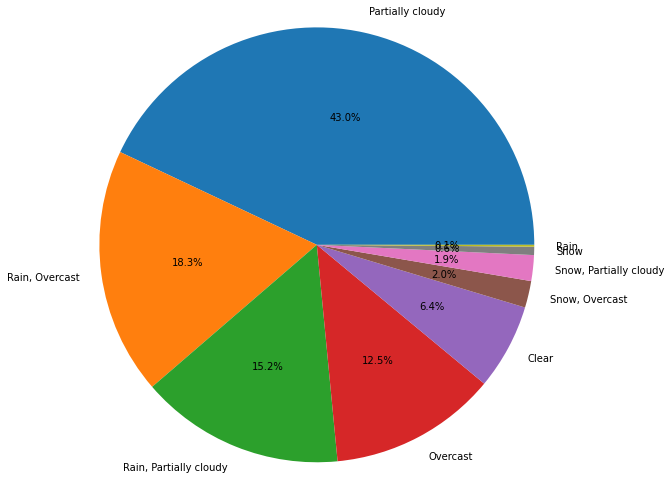

In [24]:
# display weather conditions as a pie chart
pie = weather['Conditions'].value_counts()
print(pie, '\n')
labels = pie.index 
plt.pie(pie, labels= labels,autopct='%.1f%%', radius=2.5)
plt.show()

In [25]:
# create Day, Month and Year columns and set them as date data type 
#weather['Day'] = weather['Date time'].dt.day
#weather['Month'] = weather['Date time'].dt.month
#weather['Year'] = weather['Date time'].dt.year
#weather

In [26]:
# check for null values 
weather.isnull().sum()

Name                     0
Date time                0
Maximum Temperature      0
Minimum Temperature      0
Temperature              0
Wind Chill             786
Heat Index             974
Precipitation            0
Snow                     0
Snow Depth               0
Wind Speed               0
Wind Direction           0
Wind Gust              568
Visibility               0
Cloud Cover              0
Relative Humidity        0
Conditions               0
dtype: int64

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

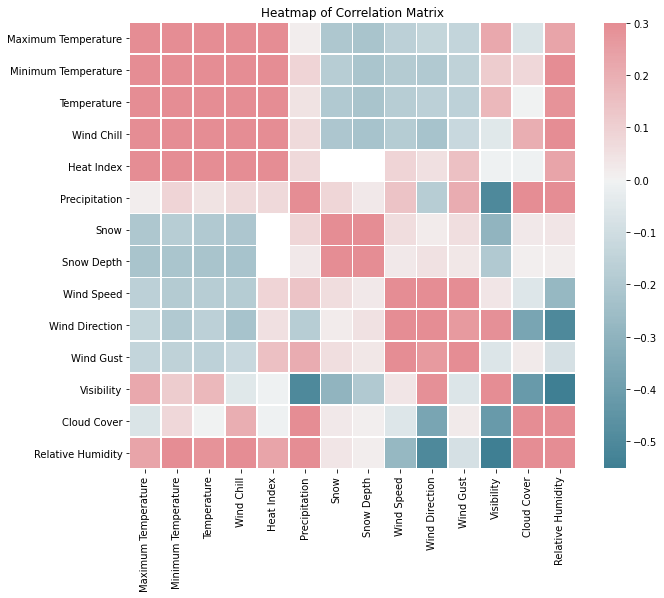

In [27]:
# Heatmap of features
corr = weather.corr()
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

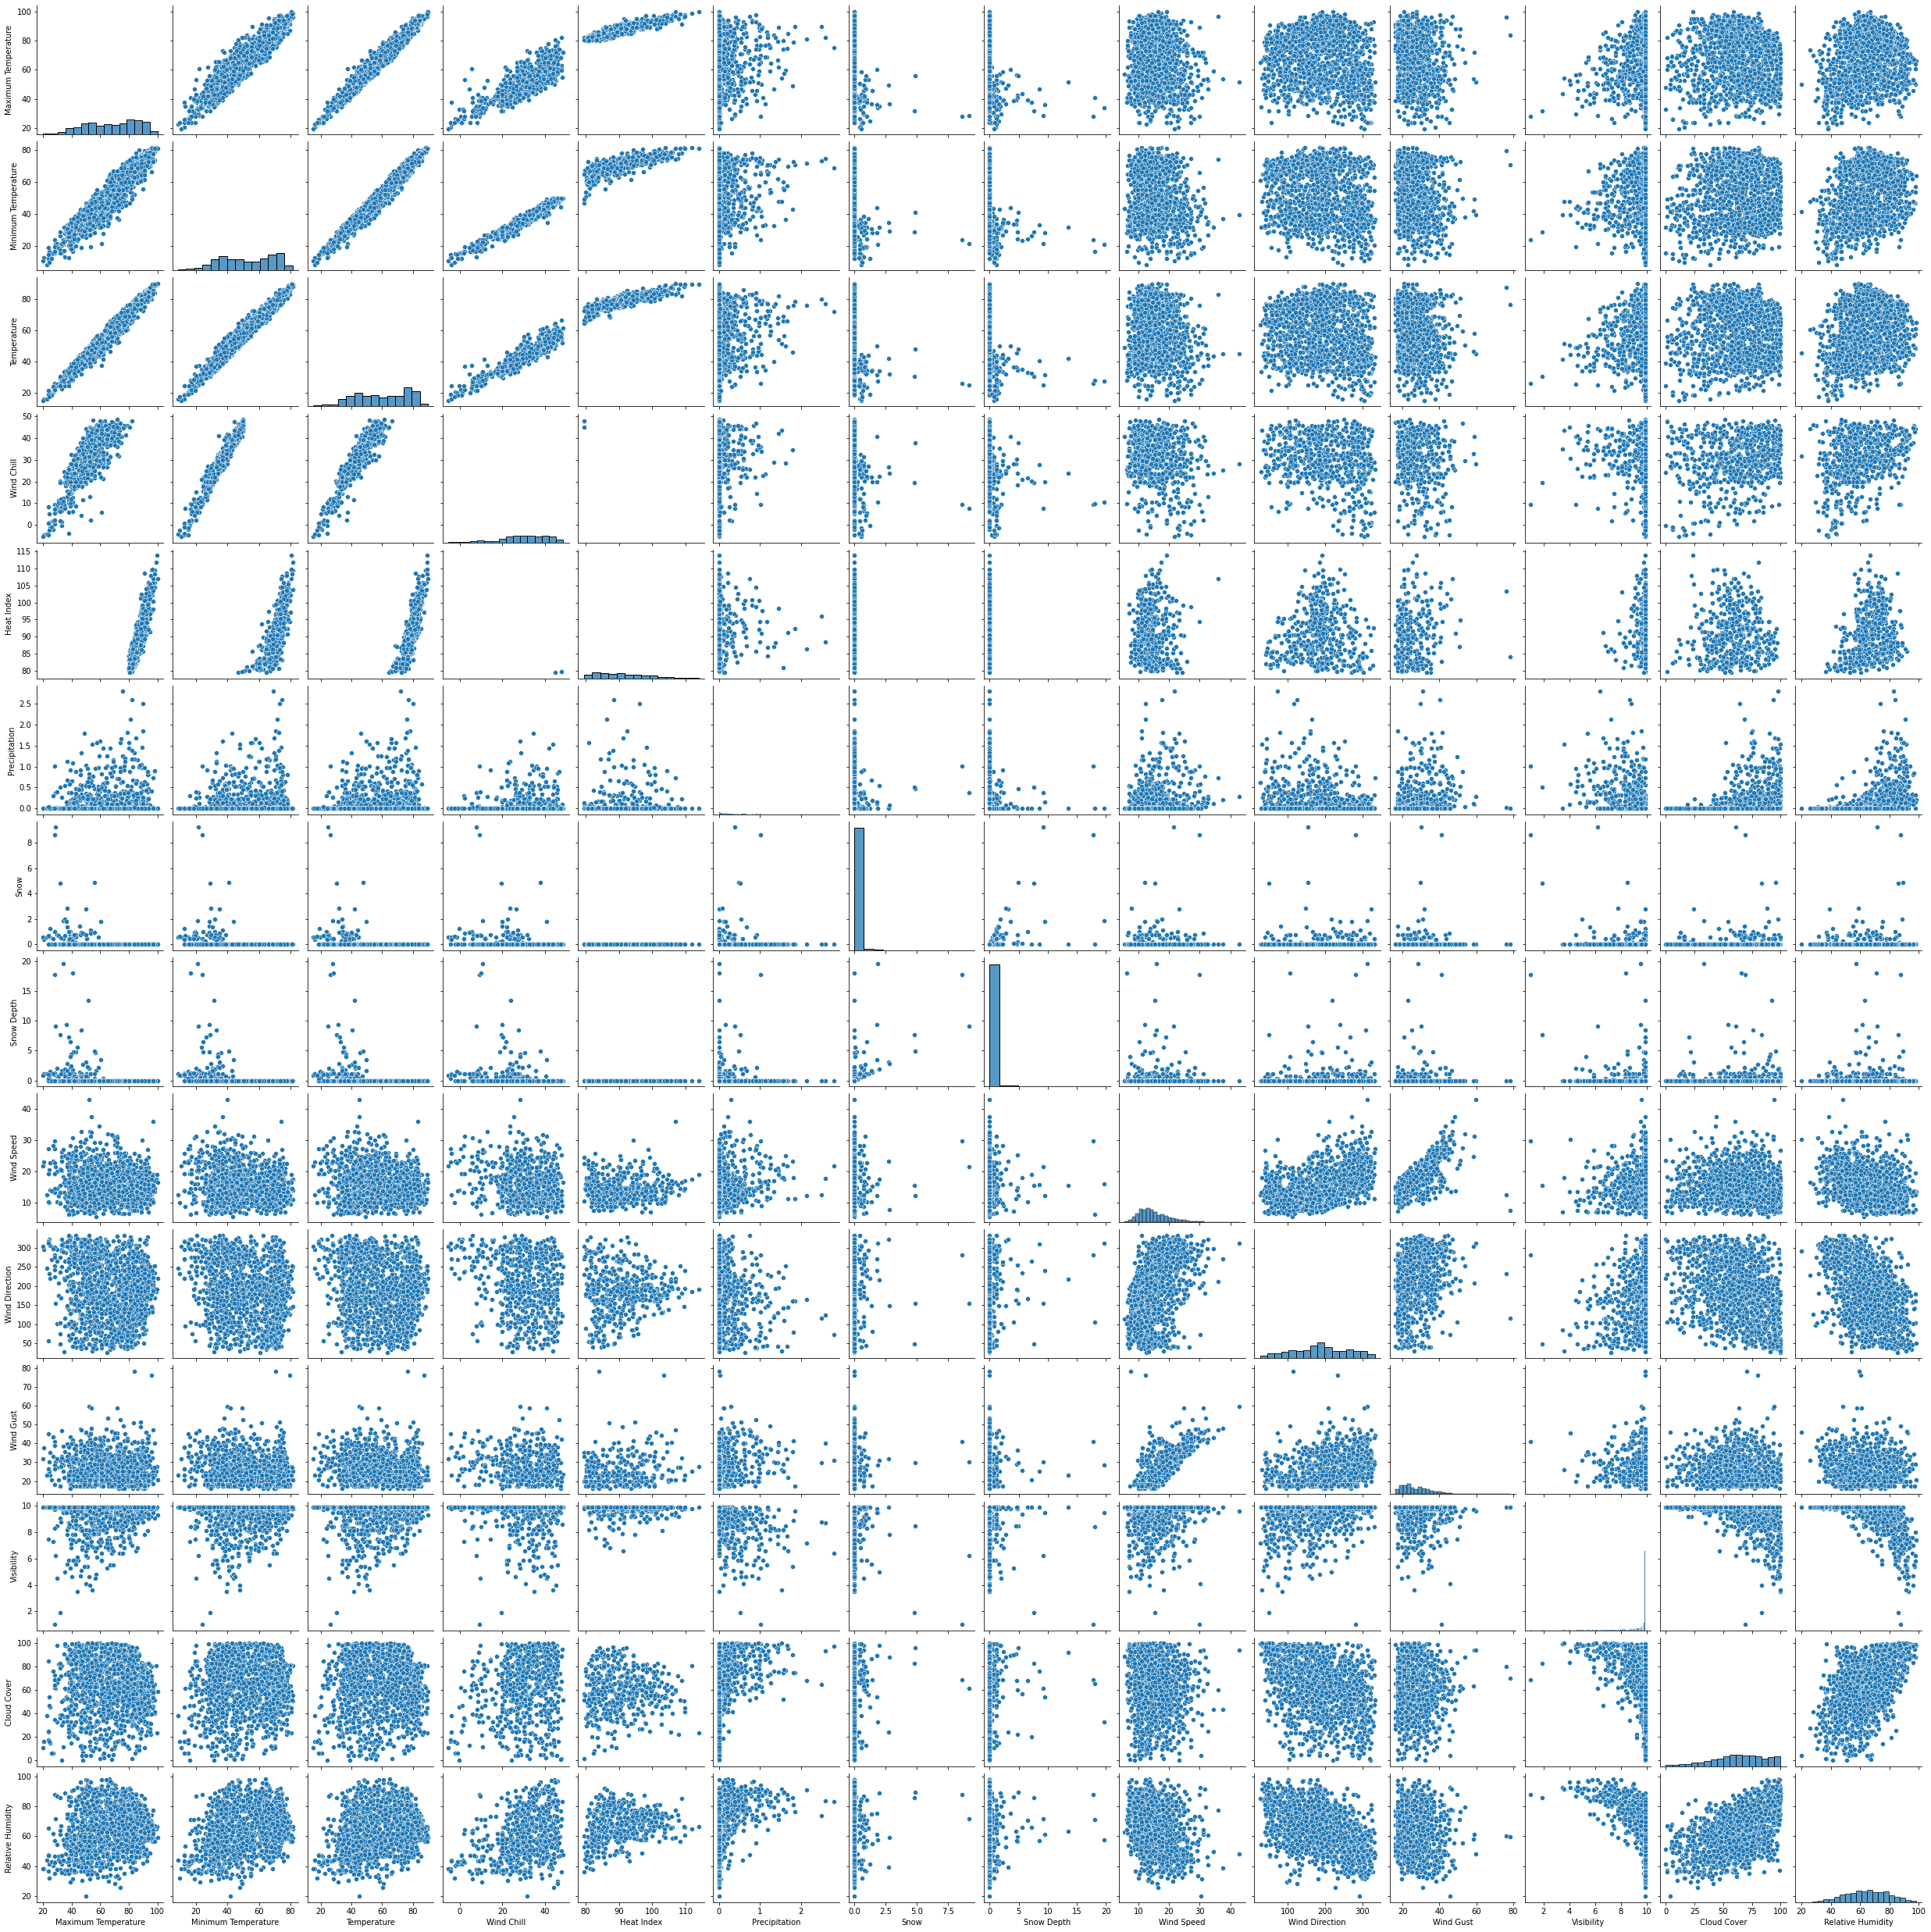

In [28]:
sns.pairplot(weather)

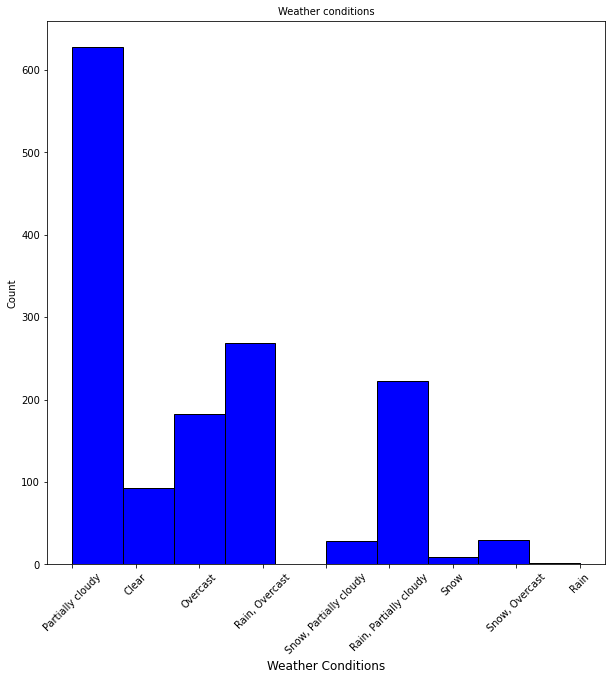

In [29]:
#Histogram of weather conditions
fig = plt.figure(figsize=(10,10))
plt.hist(weather['Conditions'], color = 'blue',edgecolor = 'black')
plt.title('Weather conditions', color = 'Black', size = 10)
plt.xlabel('Weather Conditions', size= 12)
plt.tick_params(axis='x', labelsize=10, rotation=45)
plt.ylabel('Count')
plt.show()

### Merging Data Sources

In [92]:
#looking at shape data to see how many rows and columns i should expect
#in the new data set. 128758 rows and 22 columns
crash_shape = crash.shape
weather_shape = weather.shape

print('the crash data has', crash_shape,'rows and columns')
print('the weather data has',weather_shape,'rows and columns')

the crash data has (106422, 6) rows and columns
the weather data has (1461, 17) rows and columns


In [95]:
#Removes timezone and strips the time of dat from the crash REPORTDATE
#column to prepared for the merge
crash['REPORTDATE'] = pd.to_datetime(crash['REPORTDATE'])
crash['REPORTDATE'] = crash['REPORTDATE'].dt.tz_convert(None)
crash['REPORTDATE'] = crash['REPORTDATE'].dt.strftime('%Y-%m-%d')
crash['REPORTDATE'] = pd.to_datetime(crash['REPORTDATE'])

#need to convert date time column in the weather DF so it can merge
weather['Date time'] = pd.to_datetime(weather['Date time'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [97]:
#merging the files on the date
merged = pd.merge(crash, weather, how = 'inner', 
                  left_on = crash['REPORTDATE'],
                  right_on = weather['Date time'])
print(merged.shape)
print(merged.columns)
print(merged.dtypes)

(106422, 24)
Index(['key_0', 'REPORTDATE', 'CrashCount', 'Hour', 'Day', 'Month', 'Year',
       'Name', 'Date time', 'Maximum Temperature', 'Minimum Temperature',
       'Temperature', 'Wind Chill', 'Heat Index', 'Precipitation', 'Snow',
       'Snow Depth', 'Wind Speed', 'Wind Direction', 'Wind Gust', 'Visibility',
       'Cloud Cover', 'Relative Humidity', 'Conditions'],
      dtype='object')
key_0                  datetime64[ns]
REPORTDATE             datetime64[ns]
CrashCount                      int64
Hour                            int64
Day                             int64
Month                           int64
Year                            int64
Name                           object
Date time              datetime64[ns]
Maximum Temperature           float64
Minimum Temperature           float64
Temperature                   float64
Wind Chill                    float64
Heat Index                    float64
Precipitation                 float64
Snow                          fl

In [33]:
#drop and rename columns
#merged = merged.drop(columns = ['Date time', 'Year_x','Day_y', 'Month_y', 'Year_y']).rename(columns={"Day_x": "Day", "Month_x": "Month"})
#merged.columns

KeyError: ignored

In [98]:
#drop and rename columns
merged = merged.drop(columns = ['Date time', 'Maximum Temperature', 'Minimum Temperature', 'Wind Chill', 'Heat Index',
                               'Wind Speed', 'Wind Direction', 'Wind Gust', 'Cloud Cover','Relative Humidity', 'Temperature',
                                'Visibility', 'Conditions', 'Snow', 'Snow Depth', 'Name'])
merged.columns

Index(['key_0', 'REPORTDATE', 'CrashCount', 'Hour', 'Day', 'Month', 'Year',
       'Precipitation'],
      dtype='object')

In [99]:
#grouping by date 
merged2 = merged.groupby(['Hour','Day','Month'], as_index=False).agg(
{
    'CrashCount':'count',
    'Precipitation':'mean'
})
print(merged2.dtypes)
print(merged2.shape)
merged2

Hour               int64
Day                int64
Month              int64
CrashCount         int64
Precipitation    float64
dtype: object
(8756, 5)


,Hour,Day,Month,CrashCount,Precipitation
0,0,1,1,14,0.060714
1,0,1,2,13,0.019231
2,0,1,3,19,0.247368
3,0,1,4,19,0.015789
4,0,1,5,11,0.085455
...,...,...,...,...,...
8751,23,31,5,24,0.236250
8752,23,31,7,19,0.017895
8753,23,31,8,16,0.013125
8754,23,31,10,15,0.150667


In [100]:
#dummies on hour
dummy = pd.get_dummies(merged2['Hour'])
dummy.columns = ['Hour_0','Hour_1','Hour_2','Hour_3','Hour_4','Hour_5','Hour_6','Hour_7','Hour_8','Hour_9',
                 'Hour_10','Hour_11','Hour_12','Hour_13','Hour_14','Hour_15','Hour_16','Hour_17','Hour_18',
                 'Hour_19','Hour_20','Hour_21','Hour_22','Hour_23']
merged2 = pd.concat([merged2, dummy] , axis = 1)

In [101]:
#real dummies on Day
dummy2 = pd.get_dummies(merged2['Day'])
dummy2.columns = ['Day_1','Day_2','Day_3','Day_4','Day_5','Day_6','Day_7','Day_8','Day_9','Day_10',
                  'Day_11','Day_12','Day_13','Day_14','Day_15','Day_16','Day_17','Day_18','Day_19','Day_20',
                  'Day_21','Day_22','Day_23','Day_24','Day_25','Day_26','Day_27','Day_28','Day_29','Day_30',
                  'Day_31']              
merged2 = pd.concat([merged2, dummy2] , axis = 1)

In [102]:
#real dummies on month
dummy3 = pd.get_dummies(merged2['Month'])
dummy3.columns = ['Month_1', 'Month_2','Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
                 'Month_10', 'Month_11', 'Month_12']              
merged2 = pd.concat([merged2, dummy3] , axis = 1)
merged2

,Hour,Day,Month,CrashCount,Precipitation,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,0,1,1,14,0.060714,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,2,13,0.019231,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,3,19,0.247368,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,4,19,0.015789,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,5,11,0.085455,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8751,23,31,5,24,0.236250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
8752,23,31,7,19,0.017895,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
8753,23,31,8,16,0.013125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
8754,23,31,10,15,0.150667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [103]:
merged2['Precipitation_indicator'] = merged2.where(merged2['Precipitation'] != 0, 1, inplace = True)
merged2

,Hour,Day,Month,CrashCount,Precipitation,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Precipitation_indicator
0,0,1,1,14,0.060714,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,None
1,0,1,2,13,0.019231,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,None
2,0,1,3,19,0.247368,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,None
3,0,1,4,19,0.015789,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,None
4,0,1,5,11,0.085455,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8751,23,31,5,24,0.236250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,None
8752,23,31,7,19,0.017895,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,None
8753,23,31,8,16,0.013125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,None
8754,23,31,10,15,0.150667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,None


In [84]:
#real dummies on precipitaion
dummy2 = pd.get_dummies(merged2['Precipitation_Dummy'])
dummy2.columns = ['Precipitation', 'No_Precipitation']
merged2 = pd.concat([merged2, dummy2] , axis = 1)
merged2 = merged2.drop(columns = ['Precipitation_Dummy'])

KeyError: ignored

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

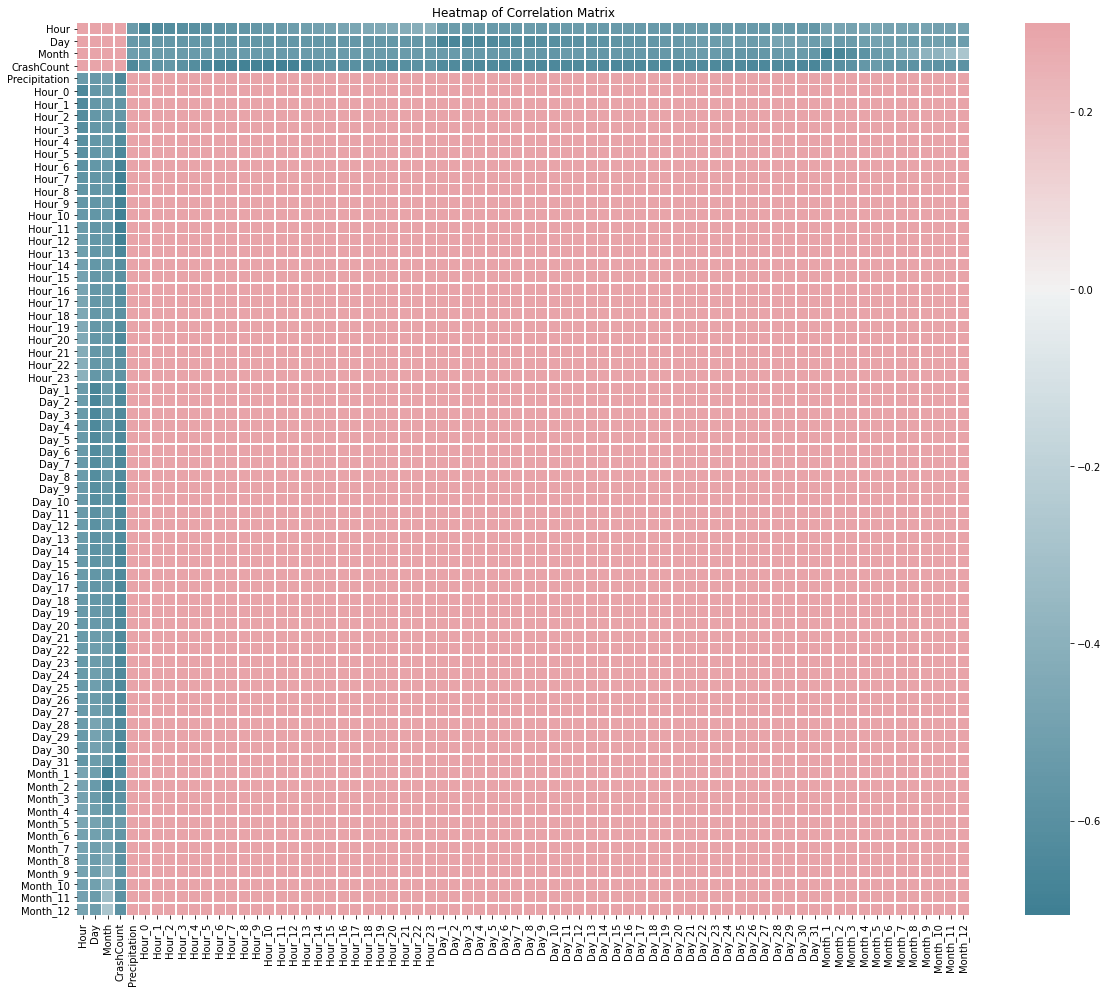

In [85]:
# Heatmap of features
corr = merged2.corr()
plt.figure(figsize = (20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

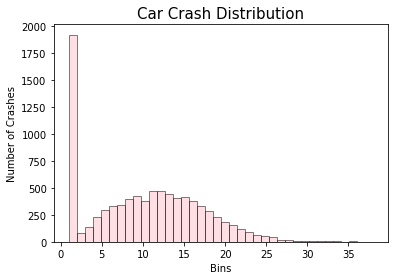

In [48]:
#histogram for Crashs
x = merged2['CrashCount']
num_bins = 38
plt.hist(x, num_bins, facecolor='pink', alpha=0.5, ec='black')

plt.xlabel('Bins')
plt.ylabel('Number of Crashes')
plt.title('Car Crash Distribution', fontsize = 15)

plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7f9e8bb04810>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9e8bb08850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e8bb10810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e8bb10310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9e8bb04d90>,
  <matplotlib.lines.Line2D at 0x7f9e8bb08310>]}

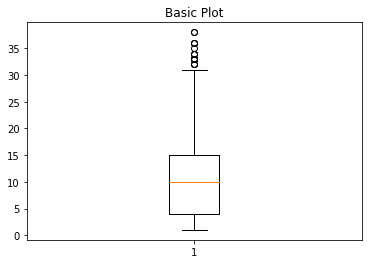

In [49]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(merged2['CrashCount'])

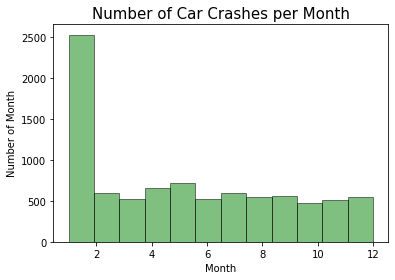

In [50]:
#histogram for month
x = merged2['Month']
num_bins = 12
plt.hist(x, num_bins, facecolor='green', alpha=0.5, ec='black')

plt.xlabel('Month')
plt.ylabel('Number of Month')
plt.title('Number of Car Crashes per Month', fontsize = 15)

plt.show()

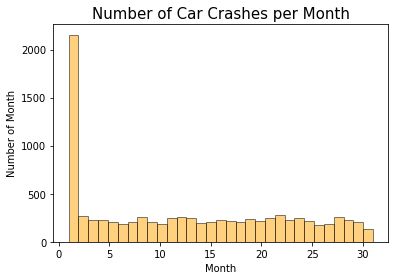

In [51]:
#histogram for month
x = merged2['Day']
num_bins = 31
plt.hist(x, num_bins, facecolor='Orange', alpha=0.5, ec='black')

plt.xlabel('Month')
plt.ylabel('Number of Month')
plt.title('Number of Car Crashes per Month', fontsize = 15)

plt.show()

### Ordinary Least Squares Analysis

In [104]:
ols_model1 = smf.ols(formula='CrashCount ~ Month', data=merged2).fit() 
print(ols_model1.summary())

                            OLS Regression Results                            
Dep. Variable:             CrashCount   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     2015.
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        01:53:36   Log-Likelihood:                -28467.
No. Observations:                8756   AIC:                         5.694e+04
Df Residuals:                    8754   BIC:                         5.695e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8966      0.114     51.872      0.0

In [105]:
ols_model1 = smf.ols(formula='CrashCount ~ Hour', data=merged2).fit() 
print(ols_model1.summary())

                            OLS Regression Results                            
Dep. Variable:             CrashCount   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     1886.
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        01:53:38   Log-Likelihood:                -28520.
No. Observations:                8756   AIC:                         5.704e+04
Df Residuals:                    8754   BIC:                         5.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4625      0.106     60.938      0.0

In [106]:
ols_model1 = smf.ols(formula='CrashCount ~ Precipitation', data=merged2).fit() 
print(ols_model1.summary())

                            OLS Regression Results                            
Dep. Variable:             CrashCount   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     6157.
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        01:53:39   Log-Likelihood:                -27043.
No. Observations:                8756   AIC:                         5.409e+04
Df Residuals:                    8754   BIC:                         5.410e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.8733      0.075    184.984

                            OLS Regression Results                            
Dep. Variable:             CrashCount   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     2236.
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        01:53:41   Log-Likelihood:                -26883.
No. Observations:                8756   AIC:                         5.377e+04
Df Residuals:                    8752   BIC:                         5.380e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.0723      0.172     64.260

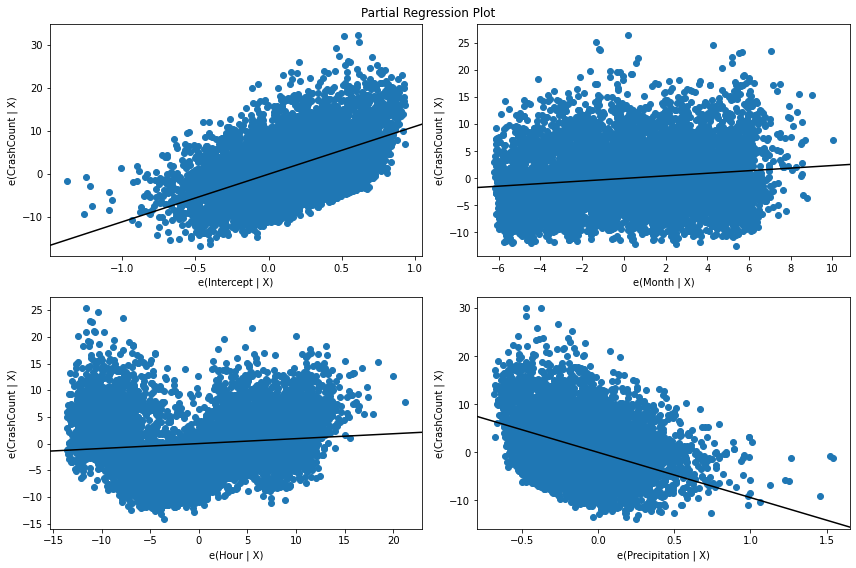

In [107]:
ols_model1 = smf.ols(formula='CrashCount ~ Month + Hour + Precipitation', data=merged2).fit() 
print(ols_model1.summary())
fig = plt.figure(figsize=(12, 8)) 
plot_partregress_grid(ols_model1, fig=fig)
plt.show()

In [90]:
avg_df = merged2.groupby(['Month','Hour'], as_index= False).agg({'CrashCount':'mean', 'Precipitation': 'mean'})
avg_df.head()

,Month,Hour,CrashCount,Precipitation
0,1,0,16.607143,0.074969
1,1,1,1.216805,0.986874
2,1,2,15.607143,0.105340
3,1,3,12.250000,0.099281
4,1,4,9.000000,0.095751


                            OLS Regression Results                            
Dep. Variable:             CrashCount   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     5.805
Date:                Thu, 06 May 2021   Prob (F-statistic):           0.000730
Time:                        01:53:46   Log-Likelihood:                -811.09
No. Observations:                 288   AIC:                             1630.
Df Residuals:                     284   BIC:                             1645.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.7985      0.855     14.967

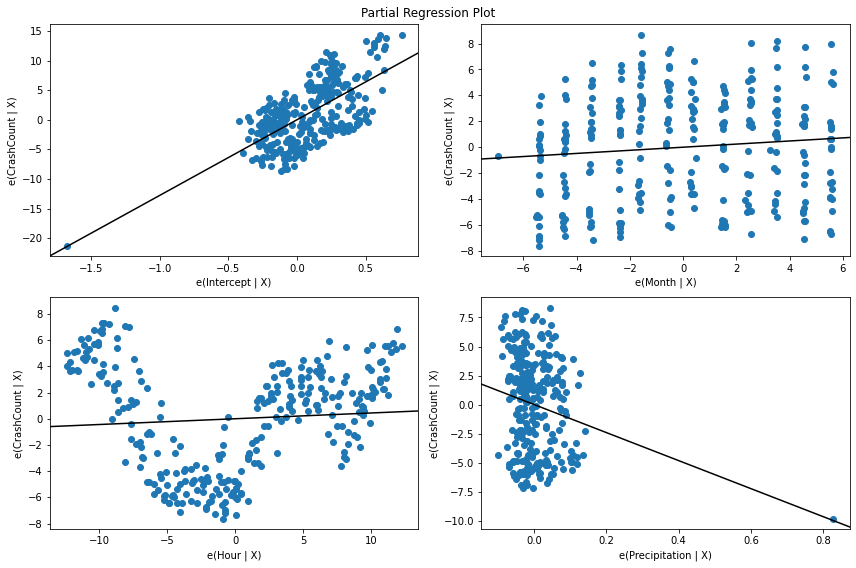

In [108]:
ols_model2 = smf.ols(formula='CrashCount ~ Month + Hour + Precipitation', data=avg_df).fit() 
print(ols_model2.summary())
fig = plt.figure(figsize=(12, 8))
plot_partregress_grid(ols_model2, fig=fig)
plt.show()